<a href="https://colab.research.google.com/github/AdamStamm/bootcamp_alura/blob/main/Projetos/Adam_Stamm_Capdehourat_Mota_Projeto_M%C3%B3dulo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uma análise da cobertura vacinal de sarampo ao longo dos tempos
 
Projeto proposto para o módulo 2 do curso de Data Science Aplicada, 2021 da [Alura](www.alura.com.br).
 
Por Adam Stamm.

## Resumo
 
Em 2016, o Sarampo foi declarado erradicado no Brasil, quando a Organização Mundial da Saúde (OMS) identificou que o país estava há um ano sem registro de casos. Entretanto, em 2018, o país voltou a apresentar registros da doença fazendo com que o certificado de erradicação da doença fosse revogado.

No Brasil, onde mais de 50% da população acredita que as vacinas são importantes, seguras e eficazes, foi identificada uma possível queda nesses índices entre o período de 2015 e 2019, de acordo com o estudo global de [mapeamento de tendências globais na confiança de vacinas e investigação de barreiras para vacinação](https://www.thelancet.com/action/showPdf?pii=S0140-6736%2820%2931558-0), disponibilizado pela revista científica [Lancet](https://www.thelancet.com/).
 
A [OMS](https://www.who.int/news-room/spotlight/ten-threats-to-global-health-in-2019) incluiu em 2019 a hesitação de vacinas num rol das 10 maiores ameaças a saúde mundial. Segundo a mesma, a vacinação evita de 2 a 3 milhões de mortes por ano e mais de 1,5 milhão podem ser evitadas caso a cobertura vacinal melhore. Entretanto, a incidência do Sarampo aumentou 30% no mundo e retornou em países que estavam próximos de eliminar a doença.
 
O objetivo desse projeto é estudar o comportamento da cobertura vacinal, a fim de promover uma reflexão sobre o tema. Além disso, serão abordadas a história e a importância das vacinas para a humanidade.

##Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Carregando conjuntos dos dados que serão analizados

In [2]:
#Dados do tabnet
cobertura_imuno_por_ano = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A213015189_28_143_208-cobertura_imuno_por_ano.csv',
                                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2015 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A194826189_28_143_208_regiao_imuno_2015.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2016 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A194914189_28_143_208_regiao_imuno_2016.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2017 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A194951189_28_143_208_regiao_imuno_2017.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2018 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A195023189_28_143_208_regiao_imuno_2018.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
regiao_imuno2019 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A195052189_28_143_208_regiao_imuno_2019.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')

uf_2015 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A104339189_28_143_208_uf_2015.csv', 
                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
uf_2016 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A104425189_28_143_208_uf_2016.csv', 
                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
uf_2017 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A104458189_28_143_208_uf_2017.csv', 
                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
uf_2018 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A104531189_28_143_208_uf_2018.csv', 
                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')
uf_2019 = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/A104604189_28_143_208_uf_2019.csv', 
                      encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=19, thousands='.', decimal=',')

#Dados do World Data Bank

world_data = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/API_SH.IMM.MEAS_DS2_en_csv_v2_1745859_measles_world_data_bank.csv',
                         skiprows=4)

#dados transcritos do portal de arquivos de saúde.
casos_sarampo_regiao = pd.read_csv('https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/casos_confirmados_sarampo_regiao.csv', sep=';')

#Dados extraídos do boletim epidemiologico de Outubro de 2020 do ministério da saúde.
boletim_out2020= '''ID UF Confirmados "Porcentagem de Confirmados" Óbitos "Porcentagem de Óbitos"
1 Pará 5.287 64,5 5 71,4
2 "Rio de Janeiro" 1.333 16,3 1 14,3
3 "São Paulo" 822 10,0 1 14,3
4 Paraná 377 4,6 0 0,0
5 "Santa Catarina" 110 1,3 0 0,0
6 Amapá 107 1,3 0 0,0
7 "Rio Grande do Sul" 37 0,5 0 0,0
8 Pernambuco 34 0,4 0 0,0
9 "Minas Gerais" 21 0,3 0 0,0
10 Maranhão 17 0,2 0 0,0
11 Goiás 8 0,1 0 0,0
12 Sergipe 8 0,1 0 0,0
13 Bahia 7 0,1 0 0,0
14 Ceará 7 0,1 0 0,0
15 "Mato Grosso do Sul" 7 0,1 0 0,0
16 Rondônia 6 0,1 0 0,0
17 "Distrito Federal" 5 0,1 0 0,0
18 Amazonas 4 0,0 0 0,0
19 Alagoas 3 0,0 0 0,0
20 "Mato Grosso" 1 0,0 0 0,0
21 Tocantins 1 0,0 0 0,0'''

#Dados extraídos do boletim epidemiologico de Novembro de 2020 do ministério da saúde.
boletim_nov2020 = '''ID UF Confirmados "Porcentagem de Confirmados" Óbitos "Porcentagem de Óbitos"
1 Pará 5.327 64,5 5 71,4
2 "Rio de Janeiro" 1.340 16,2 1 14,3
3 "São Paulo" 825 10,0 1 14,3
4 Paraná 377 4,6 0 0,0
5 Amapá 115 1,4 0 0,0
6 "Santa Catarina" 110 1,3 0 0,0
7 "Rio Grande do Sul" 37 0,4 0 0,0
8 Pernambuco 34 0,4 0 0,0
9 "Minas Gerais" 21 0,3 0 0,0
10 Maranhão 17 0,2 0 0,0
11 "Mato Grosso do Sul" 8 0,1 0 0,0
12 Goiás 8 0,1 0 0,0
13 Sergipe 8 0,1 0 0,0
14 Bahia 7 0,1 0 0,0
15 Ceará 7 0,1 0 0,0
16 Rondônia 6 0,1 0 0,0
17 "Distrito Federal" 5 0,1 0 0,0
18 Amazonas 4 0,0 0 0,0
19 Alagoas 3 0,0 0 0,0
20 "Mato Grosso" 1 0,0 0 0,0
21 Tocantins 1 0,0 0 0,0'''



In [3]:
  casos_sarampo_regiao.head()

,regiao,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,norte,5396,4665,480,239,265,141,101,231,245,91,17,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,95
1,nordeste,13776,11364,2758,366,303,195,664,4547,607,369,0,0,0,0,0,0,57,0,0,0,57,2,1,210,866,211,0,0,0
2,sudeste,22202,10893,2635,1002,354,346,2083,45503,618,359,15,1,1,0,0,2,0,0,0,0,0,32,1,8,10,2,0,0,0
3,sul,6599,11140,1058,558,227,253,270,1770,1046,39,3,0,0,2,0,4,0,0,0,0,8,7,0,1,0,0,0,0,1
4,centro-oeste,13498,4470,766,231,113,37,208,1613,265,50,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0


In [4]:
cobertura_imuno_por_ano.head()

,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,1994,88.29,NaN,NaN,NaN,8.85,NaN,NaN,58.23,NaN,5.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.75,NaN,NaN,71.35,NaN,NaN,NaN,49.46
1,1995,103.62,NaN,NaN,NaN,10.50,NaN,NaN,77.82,NaN,4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.53,NaN,NaN,86.85,0.00,NaN,NaN,52.02
2,1996,104.19,NaN,NaN,NaN,16.50,NaN,NaN,80.85,NaN,5.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.24,NaN,NaN,80.39,0.01,NaN,NaN,52.26
3,1997,117.12,NaN,NaN,NaN,5.79,NaN,NaN,89.27,NaN,7.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.50,NaN,NaN,108.61,0.03,NaN,NaN,58.17
4,1998,111.61,NaN,NaN,NaN,12.63,NaN,NaN,95.30,NaN,18.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.97,NaN,NaN,95.26,0.84,NaN,NaN,61.01


In [5]:
boletim_out2020_io = StringIO(boletim_out2020)
sarampo_out2020 = pd.read_csv(boletim_out2020_io,encoding='ISO-8859-1', sep=' ',thousands='.', decimal=',')
sarampo_out2020['Óbitos'] = sarampo_out2020['Óbitos'].astype(int)
sarampo_out2020.head()

,ID,UF,Confirmados,Porcentagem de Confirmados,Óbitos,Porcentagem de Óbitos
0,1,Pará,5287,64.5,5,71.4
1,2,Rio de Janeiro,1333,16.3,1,14.3
2,3,São Paulo,822,10.0,1,14.3
3,4,Paraná,377,4.6,0,0.0
4,5,Santa Catarina,110,1.3,0,0.0


In [6]:
boletim_nov2020_io = StringIO(boletim_nov2020)
sarampo_nov2020 = pd.read_csv(boletim_nov2020_io,encoding='ISO-8859-1', sep=' ',thousands='.', decimal=',')
sarampo_nov2020['Óbitos'] = sarampo_nov2020['Óbitos'].astype(int)
sarampo_nov2020.head()

,ID,UF,Confirmados,Porcentagem de Confirmados,Óbitos,Porcentagem de Óbitos
0,1,Pará,5327,64.5,5,71.4
1,2,Rio de Janeiro,1340,16.2,1,14.3
2,3,São Paulo,825,10.0,1,14.3
3,4,Paraná,377,4.6,0,0.0
4,5,Amapá,115,1.4,0,0.0


#Vacinas: Uma história a ser contada
 
<i>"A ciência não tem pátria"</i>, Louis Pasteur.
 
Hoje em dia não é difícil imaginar o quão perigoso é um mundo sem vacinas, afinal estamos em pleno combate ao coronavírus (Sars-CoV-2). Agora imagine o quão perigoso era o mundo **sem nenhuma vacina**.
 
O surgimento das vacinas se deu em um momento histórico de combate à varíola, uma das doenças mais temidas no mundo no século XVIII, com uma taxa de mortalidade em torno de 10% a 40%. ([https://www.centralnacionalunimed.com.br/](https://www.centralnacionalunimed.com.br/documents/2520476/2523487/folder_cobertura_vacinal__alta+sem+marca.pdf/c18e23e3-0c27-4d09-87f8-b81bd5bd9474)).
 
De forma rudimentar, a **China**, foi possivelmente o primeiro país a descobrir uma "forma" de vacinação, na realidade, chamada de *variolação*. O método tratava de introduzir na pele de pessoas saudáveis um líquido extraído de crostas de varíola de um paciente infectado. Esse método foi levado para a Europa Ocidental e América, onde então, apesar de vários casos de óbitos relacionados a varíola, começou a ser utilizado na Inglaterra e nos Estados Unidos. [(FEIJÓ & SÁFADI, 2006)](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0021-75572006000400001)
 
Em 1798, o médico britânico Edward Jenner, publicou suas primeiras investigações sobre o tema no trabalho *Variloae Vaccinae*. Ele observou que camponeses desenvolviam uma certa imunidade conhecida por *vacinnia*, devido ao contato com vacas infectadas com varíola bovina *(cow pox)*. Isso possibilitou que as primeiras técnicas de imunização fossem desenvolvidas e, mais tarde (1870), Louis Pasteur, químico e cientista francês, e Robert Koch, médico, patologista e bacteriologista alemão, estabelecessem a relação de causa-efeito entre a presença de microorganismos patogênicos e doenças. A fim de homenagear Jenner, Pasteur deu o nome de vacina. [(FEIJÓ & SÁFADI,2006)](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0021-75572006000400001)
 
Em 1885, Pasteur desenvolve a vacina contra a raiva humana.
 
<center>
<img src='https://exame.com/wp-content/uploads/2019/09/gettyimages-157204335.gif?quality=70&strip=info&resize=680,453'>
</center>
<center>O nome vacina tem origem no latin "vaccinae" e "vacca" , significado de derivado da vaca.</center>

##Vacinas: O que são?
 
Produzidas com bactérias, vírus, e até mesmo com partes deles (fragmentadas), atenuados ou inativados (enfraquecidos), também pode ser produzida por uma substância química semelhante a um agente infeccioso. A vacina é reconhecida pelo sistema imunológico do indivíduo que a recebeu produzindo uma resposta que o protege da doença. A vacina, portanto, tem a finalidade de induzir o sistema imunológico do ser humano a reagir como se realmente tivesse sido infectado. [(VERMELHO, 2011)](http://redeglobo.globo.com/globociencia/noticia/2011/11/artigo-louis-pasteur-foi-determinante-para-criacao-das-primeiras-vacinas.html)
 
Além das formas de vacinas acima, e desde 1796 quando Edward Jenner inoculou um garoto de oito anos com a varíola bovina, criando a primeira vacina, hoje, durante a pandemia de Covid está ocorrendo uma revolução na forma de produção das vacinas, com vacinas feitas por mRNA, ou RNA mensageiro. [(CARDOSO, 2020)](https://tecnoblog.net/meiobit/432695/como-funciona-a-vacina-de-mrna-a-mais-promissora-contra-o-covid-19/)
 
*“Estamos diante de fatos inusitados e uma experiência nova, extraordinária. Em nossos melhores sonhos, seria impossível imaginar que, do ponto de vista de vacinas, conseguiríamos andar tão rápido e ir tão longe"* [(FORATO, 2020)](https://canaltech.com.br/saude/vacinas-de-mrna-contra-covid-o-que-sao-e-por-que-vao-revolucionar-a-ciencia-174922/)
 
O DNA é uma molécula que armazena todas as nossas informações genéticas, inclusive, sobre como as células devem produzir proteínas; o mRNA é responsável por copiar parte desse código genético e traduzi-lo nessas proteínas. "Ele [o mRNA] é um instrumento que a célula tem para pegar um determinado código genético e enviar para estrutura que produz novas proteínas. Então, esse mensageiro diz: ‘Produza proteínas deste modo’". [(FORATO, 2020)](https://canaltech.com.br/saude/vacinas-de-mrna-contra-covid-o-que-sao-e-por-que-vao-revolucionar-a-ciencia-174922/), ou seja, no lugar de injetar um patógeno inteiro ou partes deste no corpo de um paciente, essas vacinas injetam um trecho do código genético do vírus, o qual contém as instruções para produzir uma proteína que seja reconhecível pelo nosso sistema imunológico. Na prática, no lugar de injetar a proteína pronta, essas vacinas injetam a "receita" para que elas sejam produzidas *pelo nosso próprio organismo*. [(CARBINATTO, 2020)](https://super.abril.com.br/saude/como-funcionam-4-vacinas-que-estao-sendo-testadas-contra-o-coronavirus/).
 
<center>
<img src="https://www.news-medical.net/image.axd?picture=2018%2f11%2fBy_Designua.jpg&ts=20181112091027&ri=673">
</center>
 <center>O dogma central da Biologia Molecular</center>

#A história do Sarampo no Brasil:
 
Em 1968, o Sarampo, passou a ser uma doença de notificação compulsória. Causa de morbidades e mortalidades infantis, principalmente em menores de 1 ano, a doença causava epidemias a cada 2 ou 3 anos, mesmo com a vacina tendo sido introduzida em 1960. Sua utilização pública foi o resultado de alguns governos estaduais que importavam a vacina, entretanto, de modo descontínuo. 
 
O Programa Nacional de Imunizações (PNI) foi criado em 1973 com o objetivo de organizar, implementar e avaliar as ações de imunização em todo o país. No mesmo ano e no ano seguinte foram realizadas campanhas de vacinação em áreas urbanas de diversos estados e essa forma de atuação logo foi substituída pela valorização dos serviços de rotina e expansão dos serviços básicos de saúde.
 
Na década de 1980, por dificuldades em se estabelecer as coberturas vacinais mínimas para o controle de doenças, foram realizadas campanhas em locais ondem existia uma baixa cobertura.
 
1986 foi o ano em que ocorreu a maior epidemia da década, sendo notificados 129.942 casos, o que representou uma incidência de Sarampo de 97.7 a cada 100.000 habitantes. [(DOMINGUES et.al., 1997)](http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16731997000100002#:~:text=O%20sarampo%20passou%20a%20ser,ou%203%20anos2%2C3.)
 
Experiências adquiridas em campanhas mundiais de erradicação da Varíola e do Poliovírus Selvagem Autócne nas Américas, motivaram a aplicação de estratégias de controle e de vigilância epidemiológica das doenças evitáveis por imunização. Além disso, ocorreram algumas campanhas bem sucedidas de controle e até mesmo de eliminação do Sarampo em locais como Cuba, Caribe e no próprio estado de São Paulo, o que evidenciou a possibilidade de controle e eliminação desse. 
 
Em 1992, visando atingir essa meta, o Brasil definiu a extinção da doença como prioridade, estabelecendo o Plano Nacional de Eliminação do Sarampo que tinha algumas estratégias a seguir:
 
- Vacinação da população entre 9 meses e 14 anos de idade, independente do histórico de vacinação e de doença.
 
- Manutenção de, no mínimo, 95% de cobertura vacinal para os menores de 1 ano de idade.
 
- Campanhas de <i>"follow-up"</i> entre 3 e 5 anos.
 
- Vigilância epidemiológica intensiva para os casos de suspeita.
 
- Diagnóstico laboratorial etiológico de todo caso suspeito notificado.
 
- Capacitação de pessoal para o desenvolvimento das atividades do plano em nível nacional.
 
- Campanhas de divulgação, com a finalidade de sensibilizar a população geral, bem como a classe política e profissionais de saúde.
 
O impacto dessas ações foi imediato, com o país obtendo uma redução de 81% no número de casos, contabilizados nos anos de 1991 e 1992. Entretanto, após esses anos apenas 32% dos municípios brasileiros, em média, conseguiram atingir a cobertura satisfatória para controle de Sarampo entre os menores de 1 ano de idade. Portanto, o segundo ponto da estratégia não estava tendo êxito.
 
Nos anos seguintes, apesar da cobertura vacinal igual ou maior de 95% não estar sendo atingida na maioria do país, aconteceu uma importante diminuição no número de casos confirmados por Sarampo, e por consequência, na letalidade.
 
Em setembro de 1994, durante a solenidade de entrega do certificado de erradicação da Poliomelite nas Américas, foi decidido definir uma meta para eliminação do Sarampo no hemisfério ocidental até o ano de 2000. O Ministério da Saúde brasileiro também assumiu essa meta.[(DOMINGUES et.al., 1997)](http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16731997000100002#:~:text=O%20sarampo%20passou%20a%20ser,ou%203%20anos2%2C3.)
 
O último caso autócne de Sarampo no país foi confirmado em 2000 e em 2008 foi realizada uma megaoperação contra a rubéola, onde foi criada uma comissão para acompanhar a eliminação do sarampo e da rubéola. [(DOMINGUES, 2013)](http://www.blog.saude.gov.br/index.php/servicos/32998-decadas-de-1990-e-2000-reforcam-sucesso-do-programa-nacional-de-imunizacoes)
 
Em 2015, foi registrado um último caso de sarampo no Brasil, o que fez com que o país recebesse em 2016, pela Organização Pan-Americana de Saúde, o certificado de eliminação do sarampo. Infelizmente isso durou pouco tempo, já que em 2018 o país voltou a registrar casos da doença e perdesse o certificado em fevereiro de 2019. [(MENEZES, 2019)](https://www.aosfatos.org/noticias/desenhamos-fatos-sobre-o-surto-de-sarampo-no-brasil/)

Abaixo temos a tabela de casos de sarampo registrados de 1990 a 2018

In [7]:
casos_sarampo_regiao

,regiao,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,norte,5396,4665,480,239,265,141,101,231,245,91,17,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,95
1,nordeste,13776,11364,2758,366,303,195,664,4547,607,369,0,0,0,0,0,0,57,0,0,0,57,2,1,210,866,211,0,0,0
2,sudeste,22202,10893,2635,1002,354,346,2083,45503,618,359,15,1,1,0,0,2,0,0,0,0,0,32,1,8,10,2,0,0,0
3,sul,6599,11140,1058,558,227,253,270,1770,1046,39,3,0,0,2,0,4,0,0,0,0,8,7,0,1,0,0,0,0,1
4,centro-oeste,13498,4470,766,231,113,37,208,1613,265,50,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0


In [8]:
casos = casos_sarampo_regiao.set_index('regiao')

Text(0, 0.5, 'Casos')

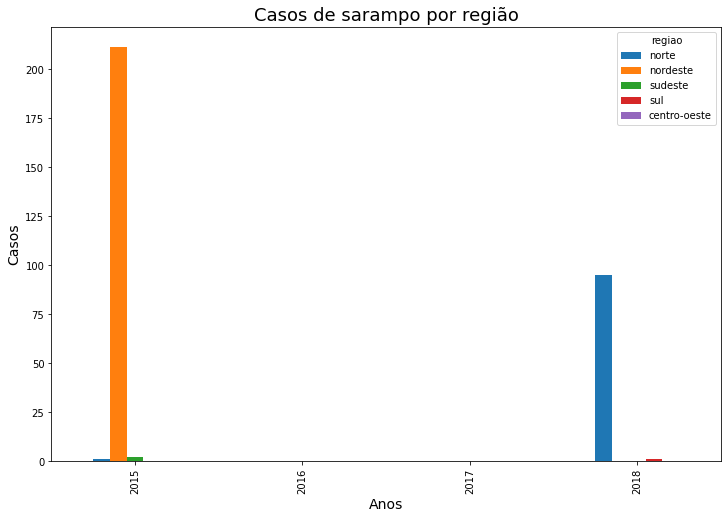

In [9]:
casos_2013_2018 = casos.T.loc['2015':]
casos_2013_2018.plot(kind='bar',figsize=(12,8))
plt.title('Casos de sarampo por região', fontsize=18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Casos', fontsize=14)

É possível notar o retorno do sarampo na região norte e sul, após alguns anos sem registros de casos, através do gráfico acima.

##O retorno do Sarampo:

Infelizmente o sarampo está de volta: ao final de 2018, o Brasil registrou 10262 casos de sarampo[(MINISTERIO DA SAUDE,2018)](https://portalarquivos2.saude.gov.br/images/pdf/2018/dezembro/14/Informe-Sarampo-n34-12dez18.pdf). Números expressivos em vista do histório da doença observado anteriormente.

Uma das causas para o retorno do sarampo, após dois anos consecutivos sem registros de casos, foi a "importação" do vírus, ou seja, brasileiros que viajaram para países onde se tinha a circulação da doença ou quando um estrangeiro vindo de um desses locais visitava o país. [(MENEZES,2019)](https://www.aosfatos.org/noticias/desenhamos-fatos-sobre-o-surto-de-sarampo-no-brasil/)

Segundo o Ministério da Saúde, o surto de sarampo em 2018, predominante no norte do país, estava relacionado com um genótipo do vírus da Venezuela. [(LABOISSIÈRE,2019)](https://agenciabrasil.ebc.com.br/saude/noticia/2019-01/brasil-tem-10274-casos-confirmados-de-sarampo)

Já em 2019, a [Prefeitura de São Paulo](https://www.prefeitura.sp.gov.br/cidade/secretarias/justica/noticias/?p=280566) informou que os casos na cidade foram importados da Noruega, Malta e Israel.

Outro fator que deve ser verificado é a **cobertura vacinal da doença**. Por isso vamos aos dados.



<center>
<img src='https://www.scielo.br/img/revistas/hcsm/v10s2/a13img05.gif'>
</center>

#Limpeza dos dados

In [10]:
cobertura_imuno_por_ano[['Ano','021 Tríplice Viral  D1','098 Tríplice Viral  D2','018 Sarampo']]

,Ano,021 Tríplice Viral D1,098 Tríplice Viral D2,018 Sarampo
0,1994,NaN,NaN,71.35
1,1995,NaN,NaN,86.85
2,1996,NaN,NaN,80.39
3,1997,NaN,NaN,108.61
4,1998,NaN,NaN,95.26
5,1999,6692.10,NaN,99.31
6,2000,77.50,NaN,105.35
7,2001,88.43,NaN,103.85
8,2002,96.92,NaN,96.02
9,2003,112.95,NaN,4.06


É possível observar que temos dados de vacinação de Sarampo de 1994 a 2002 pois a partir de 2003 a vacina contra o sarampo foi substituída pela vacina Tríplice Viral SCR(Sarampo / Caxumba / Rubéola) segundo a [página 4 das notas técnicas do Tabnet](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf). Já os dados da segunda dose da tríplice viral estão disponíveis apenas a partir de 2013. Considerando que dados de 1994 a 1996 não possuem boa precisão pela própria implantação do banco de dados e que os dados de 2019 estão incompletos vou optar por realizar a análise de 2013 a 2018.

In [11]:
#Selecionando as linhas de 2013 em diante.
cobertura_sarampo_ano = cobertura_imuno_por_ano[['Ano','021 Tríplice Viral  D1',
                                                 '098 Tríplice Viral  D2']][19:]
#Setando o ano como índice
cobertura_sarampo_ano = cobertura_sarampo_ano.set_index('Ano')
#Renomeando colunas
cobertura_sarampo_ano = cobertura_sarampo_ano.rename(columns={'021 Tríplice Viral  D1': 'triplice_viral_1,', 
                                                              '098 Tríplice Viral  D2': 'triplice_viral_2'})
#Excluindo as linhas Total e 2019
cobertura_sarampo_ano = cobertura_sarampo_ano.drop(['Total','2019'], axis=0)
cobertura_sarampo_ano.head(10)

,"triplice_viral_1,",triplice_viral_2
Ano,,
2013,107.46,68.87
2014,112.80,92.88
2015,96.07,79.94
2016,95.41,76.71
2017,90.85,76.45
2018,91.89,76.49


Na extração de dados do tabnet a seleção de **região por ano** realiza uma soma da cobertura vacinal, dessa forma, fiz uma seleção dos dados de 2015 a 2019 e uma extração específica para cada ano, assim poderemos observar de uma melhor forma esses dados, para isso serão feitas algumas limpezas desses dados. Também tomei a mesma iniciativa no que diz respeito aos dados de unidade da federação

In [12]:
#criando variáveis para facilitar a manipulação dos dados
colunas = ['Região', '021 Tríplice Viral  D1', '098 Tríplice Viral  D2']
dados = [regiao_imuno2015,regiao_imuno2016,regiao_imuno2017,
         regiao_imuno2018,regiao_imuno2019]

In [13]:
#criando uma função para automatizar a limpeza dos dados para as regiões
def limpa_dados(dados,ano,index):
  dados = dados[colunas]
  dados = dados.set_index(index)
  dados = dados.drop('Total')
  dados['ano'] = ano
 
  return dados

In [14]:
#limpando os dados das tabelas de imuno por regiao
regiao_imuno2015 = limpa_dados(regiao_imuno2015,2015,'Região')
regiao_imuno2016 = limpa_dados(regiao_imuno2016,2016,'Região')
regiao_imuno2017 = limpa_dados(regiao_imuno2017,2017,'Região')
regiao_imuno2018 = limpa_dados(regiao_imuno2018,2018,'Região')
regiao_imuno2019 = limpa_dados(regiao_imuno2019,2019,'Região')

In [15]:
#concatenando as tabelas
imuno = pd.concat([regiao_imuno2015,regiao_imuno2016,regiao_imuno2017,regiao_imuno2018])

In [16]:
#resetando o índice
imuno = imuno.reset_index()

In [17]:
#renomeando colunas
imuno = imuno.rename(columns={'021 Tríplice Viral  D1': 'triplice_viral_d1','098 Tríplice Viral  D2': 'triplice_viral_d2'})

In [18]:
imuno.head()

,Região,triplice_viral_d1,triplice_viral_d2,ano
0,1 Região Norte,85.60,62.76,2015
1,2 Região Nordeste,95.31,80.35,2015
2,3 Região Sudeste,99.92,86.97,2015
3,4 Região Sul,96.12,76.54,2015
4,5 Região Centro-Oeste,93.73,72.57,2015


In [19]:
imuno.tail()

,Região,triplice_viral_d1,triplice_viral_d2,ano
15,1 Região Norte,84.41,68.90,2018
16,2 Região Nordeste,93.46,68.70,2018
17,3 Região Sudeste,93.80,79.78,2018
18,4 Região Sul,89.59,84.66,2018
19,5 Região Centro-Oeste,91.07,83.38,2018


Agora faremos o mesmo para os dados de unidade da federação

In [20]:
colunas_uf = ['Unidade da Federação', '021 Tríplice Viral  D1', '098 Tríplice Viral  D2']
dados_uf = [uf_2015,uf_2016,uf_2017,
         uf_2018,uf_2019]

In [21]:
#criando uma função para automatizar a limpeza dos dados para as unidades federativas
def limpa_dados(dados_uf,ano,index):
  dados_uf = dados_uf[colunas_uf]
  dados_uf = dados_uf.set_index(index)
  dados_uf = dados_uf.drop('Total')
  dados_uf['ano'] = ano
 
  return dados_uf

In [22]:
#limpando os dados das tabelas de imuno por unidade da federação
uf_2015 = limpa_dados(uf_2015,2015,'Unidade da Federação')
uf_2016 = limpa_dados(uf_2016,2016,'Unidade da Federação')
uf_2017 = limpa_dados(uf_2017,2017,'Unidade da Federação')
uf_2018 = limpa_dados(uf_2018,2018,'Unidade da Federação')
uf_2019 = limpa_dados(uf_2019,2019,'Unidade da Federação')

In [23]:
#concatenando...
imuno_uf = pd.concat([uf_2015,uf_2016,uf_2017, uf_2018,uf_2019])

In [24]:
#resetando índice
imuno_uf = imuno_uf.reset_index()

In [25]:
#renomeando colunas
imuno_uf = imuno_uf.rename(columns={'021 Tríplice Viral  D1': 'triplice_viral_d1','098 Tríplice Viral  D2': 'triplice_viral_d2'})

In [26]:
imuno_uf.head()

,Unidade da Federação,triplice_viral_d1,triplice_viral_d2,ano
0,11 Rondônia,109.00,94.61,2015
1,12 Acre,84.21,51.69,2015
2,13 Amazonas,95.42,78.17,2015
3,14 Roraima,108.45,92.42,2015
4,15 Pará,71.92,45.78,2015


In [27]:
imuno.tail()

,Região,triplice_viral_d1,triplice_viral_d2,ano
15,1 Região Norte,84.41,68.90,2018
16,2 Região Nordeste,93.46,68.70,2018
17,3 Região Sudeste,93.80,79.78,2018
18,4 Região Sul,89.59,84.66,2018
19,5 Região Centro-Oeste,91.07,83.38,2018


In [28]:
world_data = world_data.rename(columns={'Country Name': 'country'})
world_data_brazil = world_data.query("country=='Brazil'")

In [29]:
world_data_brazil = world_data_brazil.drop(['Indicator Name','Indicator Code', 'Country Code'],axis=1)
world_data_brazil

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
27,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,73.0,66.0,68.0,73.0,67.0,67.0,64.0,62.0,60.0,78.0,85.0,91.0,85.0,77.0,87.0,80.0,99.0,95.0,99.0,99.0,99.0,96.0,97.0,97.0,98.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,98.0,97.0,96.0,95.0,91.0,92.0,91.0,NaN,NaN


In [30]:
colunas_interessadas = world_data_brazil.columns[21:-2]
measles_brazil = world_data_brazil[colunas_interessadas]
measles_brazil = measles_brazil.T.rename(columns={27: 'cobertura'})
measles_brazil.head()

,cobertura
1980,57.0
1981,73.0
1982,66.0
1983,68.0
1984,73.0


#Análise dos dados

Iniciaremos com um plot superficial apenas para verificar se já temos uma ideia do comportamento dos dados

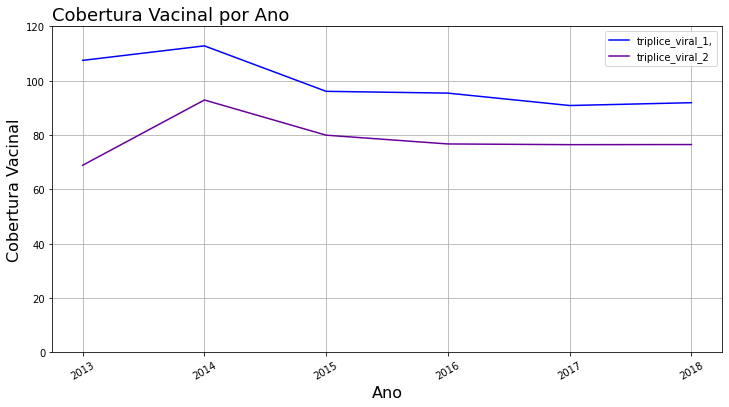

In [31]:
cmap = plt.get_cmap('brg')
colors = [cmap(i) for i in np.linspace(0, 1, len(cobertura_sarampo_ano))]
cobertura_sarampo_ano.plot(figsize=(12,6), color=colors)
plt.grid(linestyle='-')
plt.ylim(0,120)
plt.title('Cobertura Vacinal por Ano',fontsize=18, loc='left')
plt.ylabel('Cobertura Vacinal', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.xticks(rotation=30)
plt.legend()
plt.show()

Como vemos, apesar de ser uma análise inicial, esse gráfico sugere motivo para preocupações: é possível notar uma grande queda na cobertura vacinal a partir de 2014, bem como é notável o fato da segunda dose ter uma adesão muito baixa.

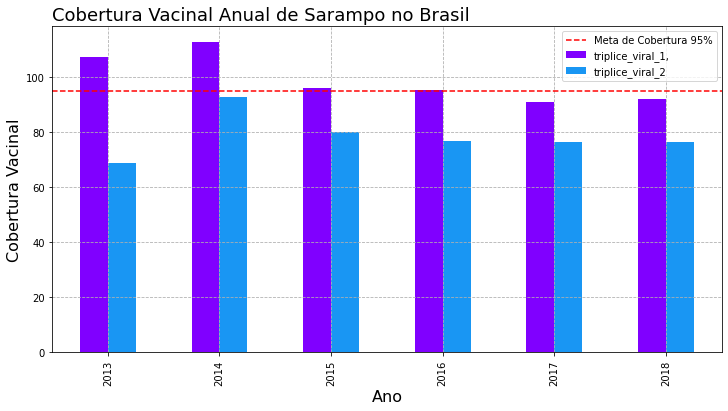

In [32]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(cobertura_sarampo_ano))]
ax = cobertura_sarampo_ano.plot(kind='bar', figsize=(12,6), color=colors)
plt.title('Cobertura Vacinal Anual de Sarampo no Brasil', fontsize=18, loc='left')
plt.axhline(y=95,linestyle='--', color='red', label='Meta de Cobertura 95%')
plt.ylabel('Cobertura Vacinal', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.grid(linestyle='--')
plt.legend()
plt.show()

Mais preocupante ainda é notar que a primeira dose está em descrescimento, pareando com os índices baixos da segunda dose.

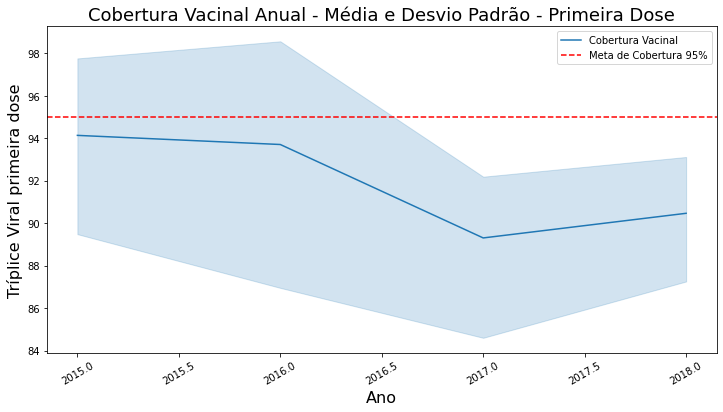

In [33]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=imuno, x='ano', y='triplice_viral_d1',label='Cobertura Vacinal')
ax.axhline(y=95,linestyle='--', color='red', label='Meta de Cobertura 95%')
plt.title('Cobertura Vacinal Anual - Média e Desvio Padrão - Primeira Dose', fontsize=18)
plt.ylabel('Tríplice Viral primeira dose',fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.xticks(rotation=30)
plt.legend()
plt.show()

No gráfico acima notamos que, embora parte do desvio padrão fique acima da meta de 95% a média dos dados em si (a curva principal) está o tempo inteiro abaixo da meta. Vamos verificar, portanto, por região isoladamente.

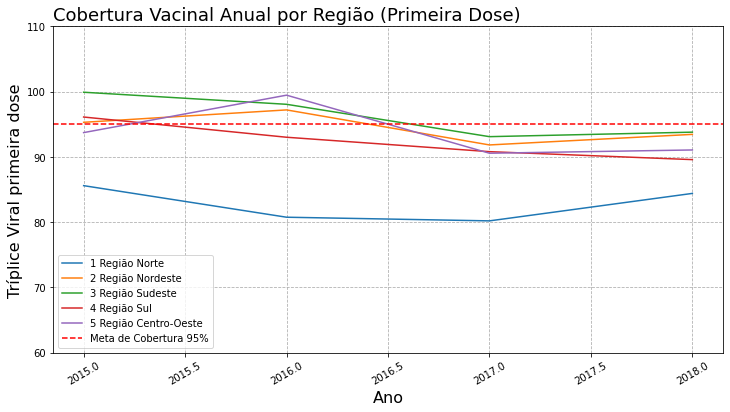

In [34]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=imuno, x='ano', y='triplice_viral_d1',hue='Região')
ax.axhline(y=95,linestyle='dashed', color='red', label='Meta de Cobertura 95%')
plt.xticks(rotation=30)
plt.title('Cobertura Vacinal Anual por Região (Primeira Dose)', fontsize=18,loc='left')
plt.ylabel('Tríplice Viral primeira dose', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.ylim(60,110)
plt.grid(linestyle='--')
plt.legend()
plt.show()

Notamos que a região norte esteve em todo o período com a meta muito abaixo do esperado, isso fez com que a média do gráfico anterior fosse influenciada. Entretanto, é nítido que no segundo semestre de 2016 todas as regiões ficaram abaixo da meta de vacinação.

No ano de 2016, ocorreu uma queda mais acentuada da curva, conforme investigação, porque aconteceu um problema de desabastecimento de vacinas no país segundo o [Ministério da Saúde]('https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/abastecimento-de-vacinas-se-normalizara-em-2017-diz-ministerio-da-saude'). O problema maior ocorreu com a vacina BCG.

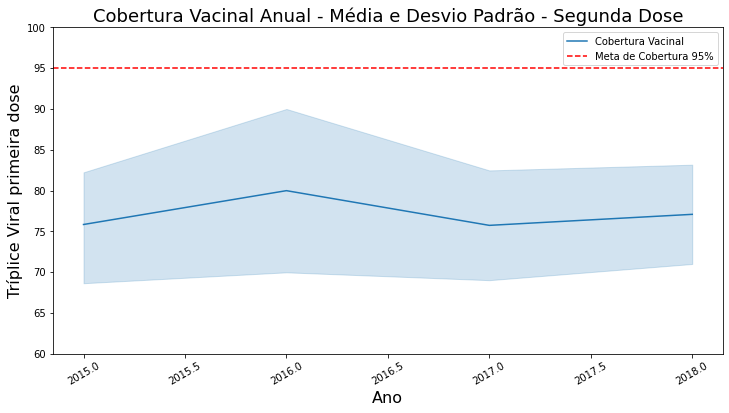

In [35]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=imuno, x='ano', y='triplice_viral_d2',label='Cobertura Vacinal')
ax.axhline(y=95,linestyle='--', color='red', label='Meta de Cobertura 95%')
plt.title('Cobertura Vacinal Anual - Média e Desvio Padrão - Segunda Dose', fontsize=18)
plt.ylabel('Tríplice Viral primeira dose',fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.ylim(60,100)
plt.xticks(rotation=30)
plt.legend()
plt.show()

Mais uma vez, no gráfico acima percebemos que a cobertura vacinal da segunda dose fica muito abaixo do esperado.

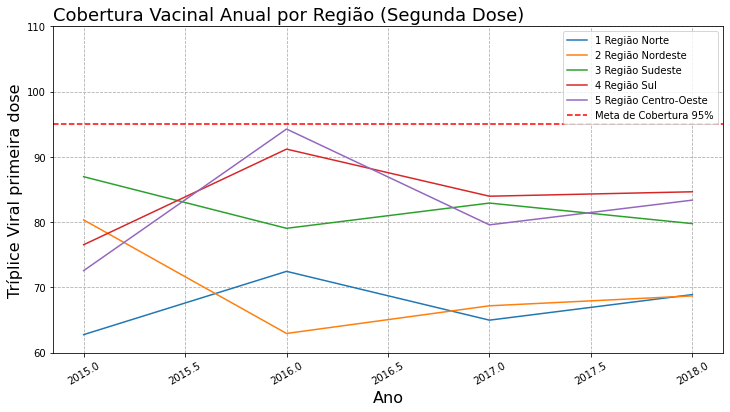

In [36]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=imuno, x='ano', y='triplice_viral_d2',hue='Região')
ax.axhline(y=95,linestyle='dashed', color='red', label='Meta de Cobertura 95%')
plt.xticks(rotation=30)
plt.title('Cobertura Vacinal Anual por Região (Segunda Dose)', fontsize=18,loc='left')
plt.ylabel('Tríplice Viral primeira dose', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.ylim(60,110)
plt.grid(linestyle='--')
plt.legend()
plt.show()

Dessa vez é visível, **nenhuma** região conseguiu atingir a meta de 95% para a segunda dose da vacina.

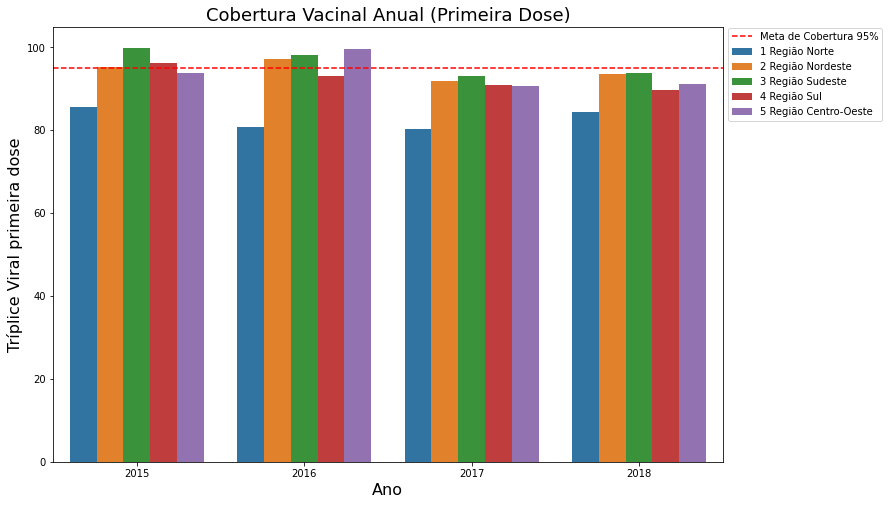

In [37]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=imuno, x='ano', y='triplice_viral_d1',hue='Região')
ax.axhline(y=95,linestyle='--', color='red', label='Meta de Cobertura 95%')
plt.title('Cobertura Vacinal Anual (Primeira Dose)', fontsize=18)
plt.ylabel('Tríplice Viral primeira dose', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.legend(bbox_to_anchor=(1,1.01))
plt.show()

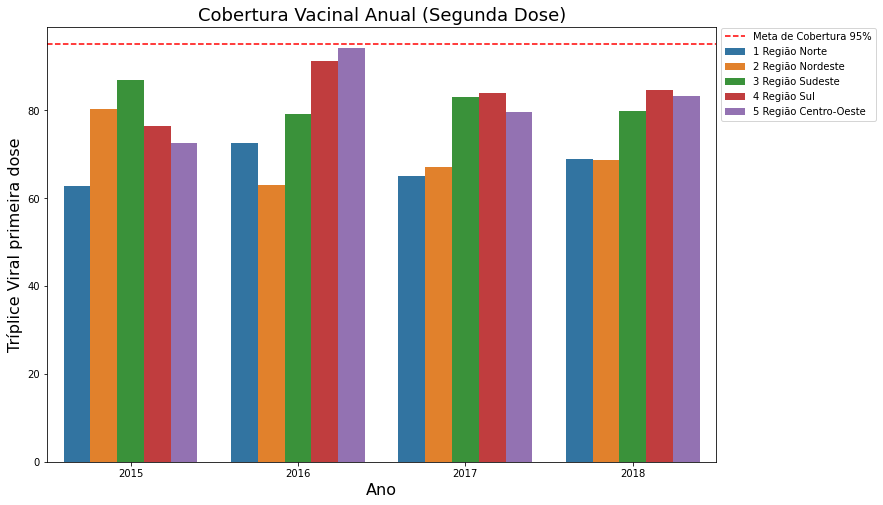

In [38]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=imuno, x='ano', y='triplice_viral_d2',hue='Região')
ax.axhline(y=95,linestyle='--', color='red', label='Meta de Cobertura 95%')
plt.title('Cobertura Vacinal Anual (Segunda Dose)', fontsize=18)
plt.ylabel('Tríplice Viral primeira dose', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.legend(bbox_to_anchor=(1,1.01))
plt.show()

Note como a região norte e nordeste tem praticamente o mesmo rendimento nos anos de 2017 e 2018.

##Histórico da Vacina do Sarampo no Brasil

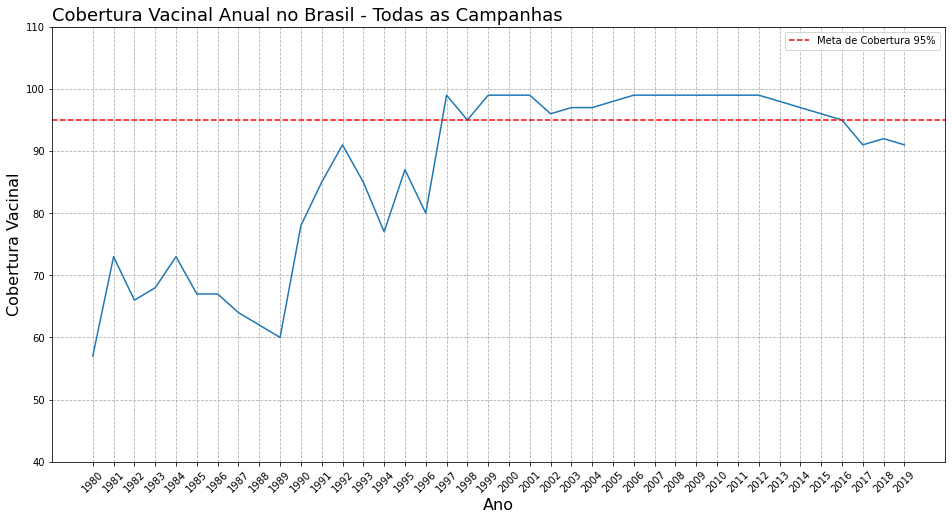

In [39]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(data=measles_brazil, x=measles_brazil.index,y='cobertura')
ax.axhline(y=95,linestyle='dashed', color='red', label='Meta de Cobertura 95%')
plt.xticks(rotation=45)
plt.title('Cobertura Vacinal Anual no Brasil - Todas as Campanhas', fontsize=18,loc='left')
plt.ylabel('Cobertura Vacinal', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.ylim(40,110)
plt.grid(linestyle='--')
plt.legend()
plt.show()

Observando esse gráfico temos a dimensão histórica do combate ao sarampo no país e não podemos permitir que todo esse avanço caia por terra. Interessante notar que em 1996, após décadas de cobertura baixa, ocorreu um surto de sarampo no estado de São Paulo e outro em Santa Catarina.[(DOMINGUES et al, 1997)](http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16731997000100002).

##Divergência entre dados

In [40]:
measles_brazil.tail(6)

,cobertura
2014,97.0
2015,96.0
2016,95.0
2017,91.0
2018,92.0
2019,91.0


In [41]:
cobertura_sarampo_ano.tail()

,"triplice_viral_1,",triplice_viral_2
Ano,,
2014,112.80,92.88
2015,96.07,79.94
2016,95.41,76.71
2017,90.85,76.45
2018,91.89,76.49


Os dados de `measles_brazil` oriundos do World Data Bank divergem dos extraídos do DataSUS. Essa divergência pode se justificar, pois os dados do DataSUS sofreram uma unificação de sistemas entre 2013 e 2015, o que pode ter causado sobreposição de dados.

##Boletins de casos atuais

In [42]:
sarampo_out2020.drop('ID', axis=1, inplace=True)
sarampo_out2020.set_index('UF', inplace=True)
sarampo_nov2020.drop('ID', axis=1, inplace=True)
sarampo_nov2020.set_index('UF', inplace=True)

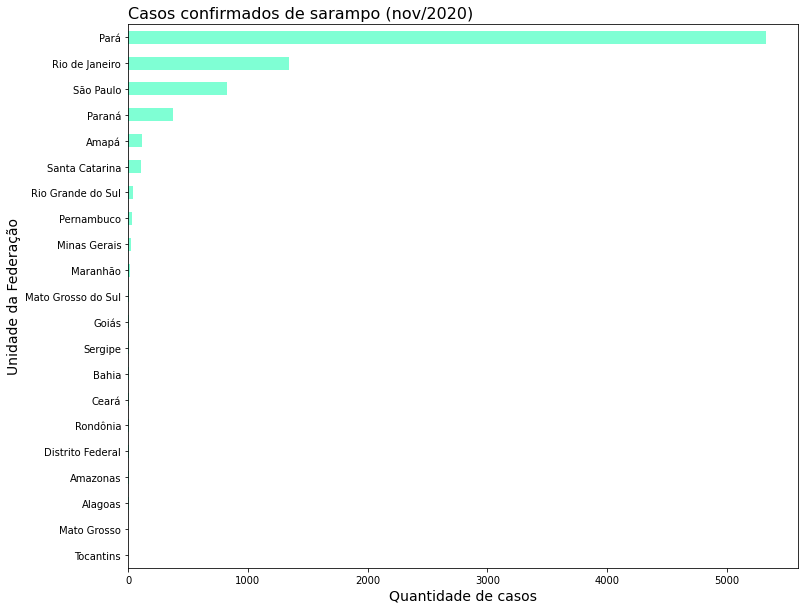

In [43]:
ax = sarampo_nov2020.sort_values('Confirmados',ascending=True).plot(y='Confirmados', kind='barh', figsize=(12,10), color=['aquamarine'])
plt.title("Casos confirmados de sarampo (nov/2020)", fontsize=16, loc='left')
ax.set_ylabel("Unidade da Federação", fontsize=14)
ax.set_xlabel("Quantidade de casos", fontsize=14)
ax.legend().remove()
plt.show()

Atualmente, o Pará lidera em número de casos da doença, seguido por Rio de Janeiro e São Paulo.

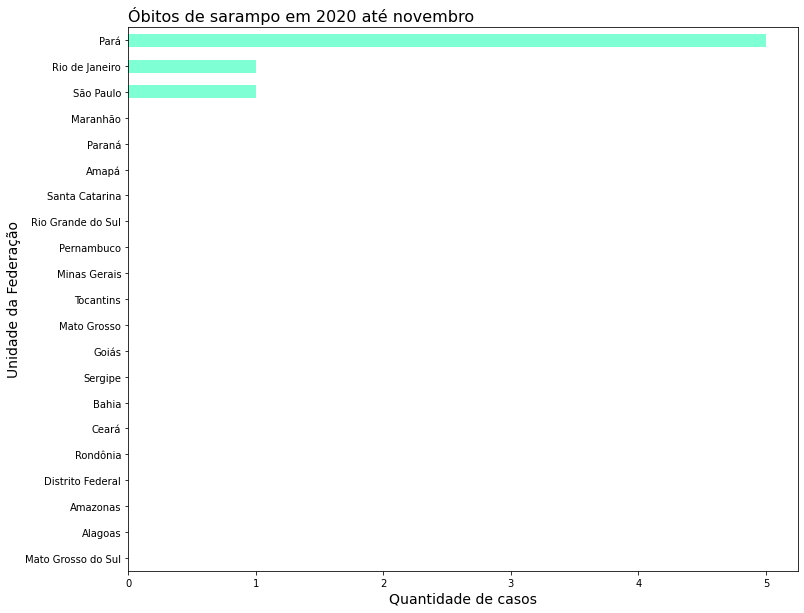

In [44]:
ax = sarampo_nov2020.sort_values('Óbitos',ascending=True).plot(y='Óbitos', kind='barh', figsize=(12,10), color=['aquamarine'])
plt.title("Óbitos de sarampo em 2020 até novembro", fontsize=16, loc='left')
ax.set_ylabel("Unidade da Federação", fontsize=14)
ax.set_xlabel("Quantidade de casos", fontsize=14)
ax.legend().remove()
plt.show()

A quantidade de óbitos registradas no ano foi de 5 no Pará, 1 no Rio de Janeiro e 1 em São Paulo.

In [45]:
diferenca_out_nov = sarampo_nov2020 - sarampo_out2020

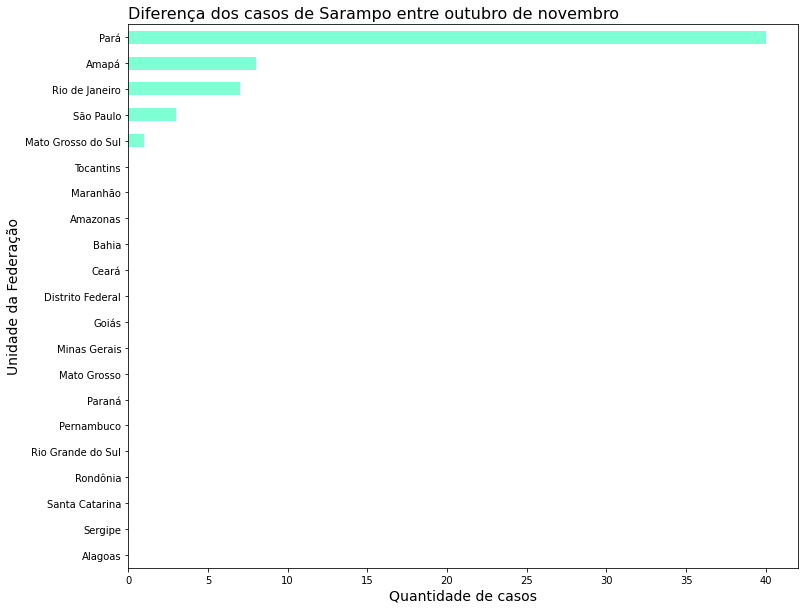

In [46]:
ax = diferenca_out_nov.sort_values('Confirmados',ascending=True).plot(y='Confirmados', kind='barh', figsize=(12,10), color=['aquamarine'])
plt.title("Diferença dos casos de Sarampo entre outubro de novembro", fontsize=16, loc='left')
ax.set_ylabel("Unidade da Federação", fontsize=14)
ax.set_xlabel("Quantidade de casos", fontsize=14)
ax.legend().remove()
plt.show()

Em apenas um mês o Pará aumentou em 40 os casos confirmados da doença, por outro lado o Paraná apresentou estabilidade nos casos e o Amapá e Mato Grosso do Sul tiveram, uma tendência de crescimento mais acentuada dos casos.

##Analisando estados com surto atual

In [47]:
imuno_uf = imuno_uf.rename(columns={'Unidade da Federação': 'UF'})

In [48]:
imuno_uf['UF'].unique()

array(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco',
       '27 Alagoas', '28 Sergipe', '29 Bahia', '31 Minas Gerais',
       '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo',
       '41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul',
       '50 Mato Grosso do Sul', '51 Mato Grosso', '52 Goiás',
       '53 Distrito Federal'], dtype=object)

In [49]:
imuno_uf.set_index('UF',inplace=True)

In [50]:
imuno_uf_t = imuno_uf.T[['15 Pará','33 Rio de Janeiro','35 São Paulo','41 Paraná','16 Amapá','50 Mato Grosso do Sul','42 Santa Catarina']]
imuno_selecao = imuno_uf_t.T

In [51]:
imuno_acumulado = imuno_selecao.groupby(['UF','ano']).sum().reset_index()

In [52]:
imuno_acumulado['ano'] = imuno_acumulado['ano'].astype(int)

In [53]:
imuno_acumulado.head()

,UF,ano,triplice_viral_d1,triplice_viral_d2
0,15 Pará,2015,71.92,45.78
1,15 Pará,2016,69.61,62.34
2,15 Pará,2017,70.90,57.37
3,15 Pará,2018,76.15,58.67
4,15 Pará,2019,44.86,38.43


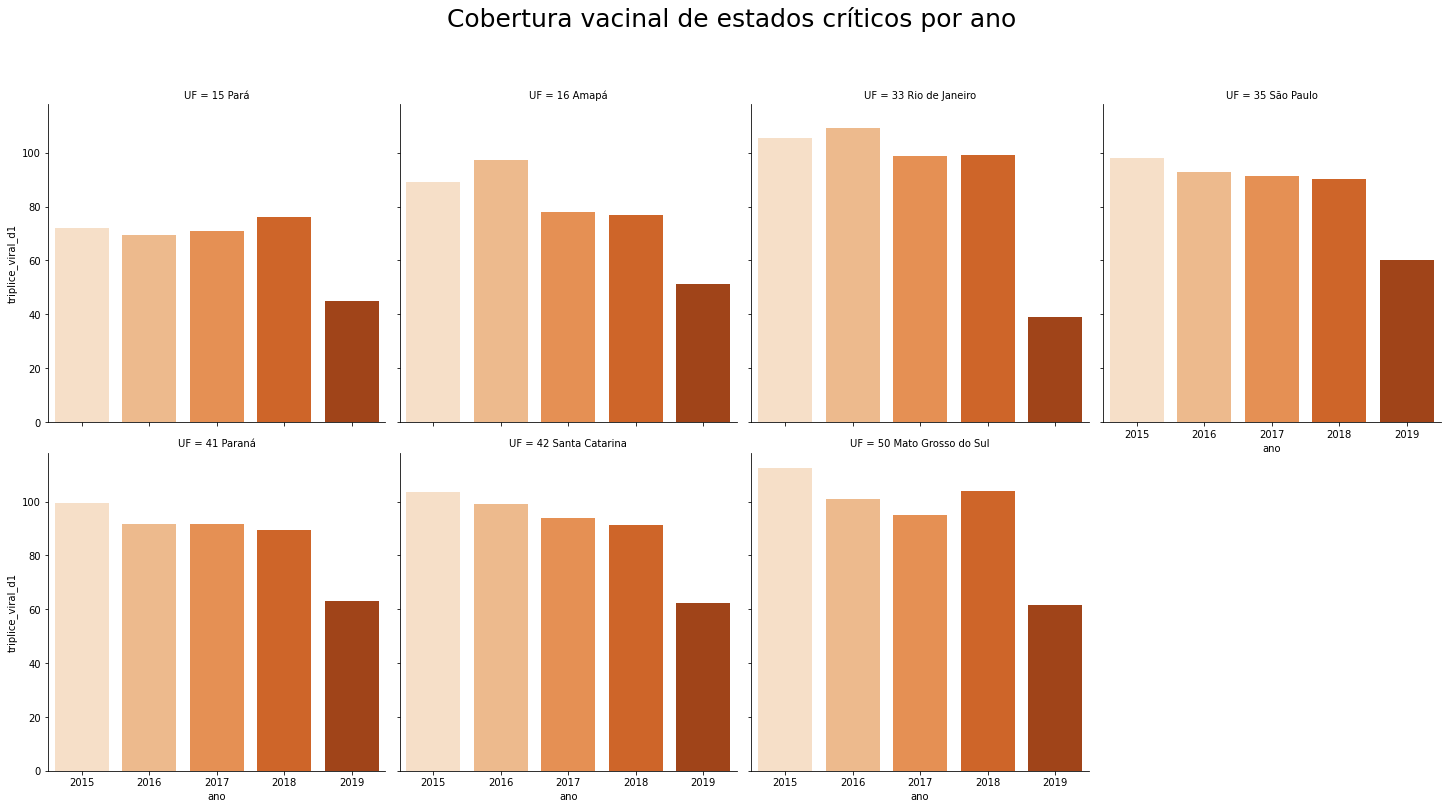

In [54]:
ax = sns.catplot(data=imuno_acumulado, x='ano',y='triplice_viral_d1', kind='bar',
                 col='UF', col_wrap=4,margin_titles=True, palette='Oranges')
ax.fig.suptitle('Cobertura vacinal de estados críticos por ano',fontsize=25, y=1.10)
ax;

Note que o Pará,local por onde o Sarampo retornou, esteve a todo o momento com a cobertura abaixo de 80%.

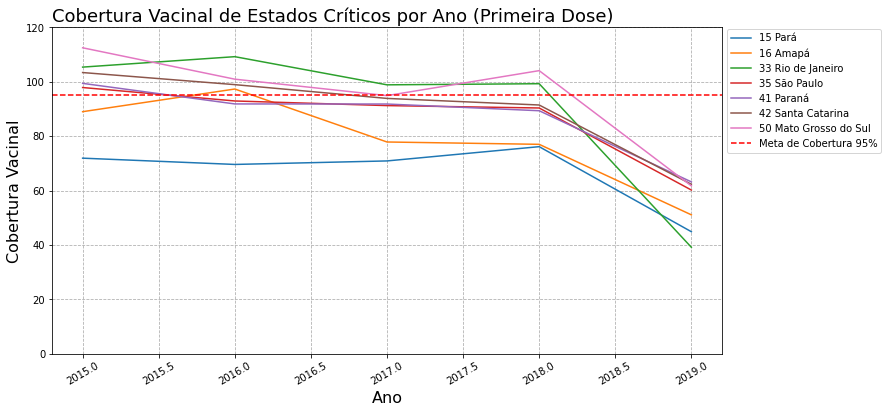

In [55]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data = imuno_acumulado, x='ano', y='triplice_viral_d1', hue='UF')
ax.axhline(y=95,linestyle='dashed', color='red', label='Meta de Cobertura 95%')
plt.xticks(rotation=30)
plt.title('Cobertura Vacinal de Estados Críticos por Ano (Primeira Dose)', fontsize=18,loc='left')
plt.ylabel('Cobertura Vacinal', fontsize=16)
plt.xlabel('Ano', fontsize=16)
plt.ylim(0,120)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1,1.01))
plt.show()

Devemos considerar que os dados de 2019 ainda estão incompletos, entretanto, a tendência não é animadora considerando que, segundo o [DataSUS]('http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def') a última atualização ocorreu em 04 de setembro de 2019.

Diversas podem ser as causas para que esteja ocorrendo essa queda na cobertura vacinal, como por exemplo o movimento anti-vacina.

#Movimento anti-vacina

Recentemente o movimento antivacinação foi incluído no relatório da OMS como uma das 10 ameaças à saúde. 

Segundo a OMS, a vacinação é uma das estratégias mais custo-efetivas de se evitar doenças, prevenindo de 2 a 3 milhões de mortes por ano e mais 1.5 milhões de mortes poderiam ser evitadas se a cobertura vacinal global for melhorada.

A OMS cita o crescimento de 30% de casos de sarampo no mundo e as razões para esse aumento são complexas, não se restringindo à hesitação às vacinas. Entretanto, alguns países próximos de erradicar a doença voltaram a reportar casos.[(Organização Mundial da Saúde, 2019)](https://www.who.int/news-room/spotlight/ten-threats-to-global-health-in-2019).

<center>
<img src = 'https://medias.cnnbrasil.com.br/panfleto-antivacina-do-seculo-19.jpeg?format=WEBP&image=https://mediastorage.cnnbrasil.com.br/IMAGES/00/00/01/17308_58AD4B5E630D02F7.jpg&width=738&height=435&resize=CROP'
</center>
<center>
Manchete de um panfleto que denunciava a vacinação contra a varíola em 1885.
</center>

Doutor Alexander M. Ross, é o autor da imagem acima veiculada em panfleto com alta divulgação durante a epidemia de varíola de 1885 em Montreal, no Caradá.
 
Aproveitando a oportunidade para ganhar notoriedade e fama, ele se descreveu como um herói, o <i>"único médico que ousou duvidar do fetiche da vacinação"</i>. Entretanto, foi descoberto que no final das contas ele havia se vacinado durante a epidemia. [(LARSON,2020)](https://www.cnnbrasil.com.br/saude/2020/10/24/movimentos-anti-vacina-usam-argumentos-do-seculo-19).
 
Ross minimizava a ameaça da varíola embora as taxas de mortalidade fossem de 30% a 40%. Era comum afirmarem que a varíola era apenas uma ameaça menor para a população[(LARSON,2020)](https://www.cnnbrasil.com.br/saude/2020/10/24/movimentos-anti-vacina-usam-argumentos-do-seculo-19). Seria o mesmo que nos dias atuais chamá-la de <i>"variolazinha".</i>
 
Segundo o artigo publicado na revista [Lancet](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31558-0/fulltext), por Figueiredo et al., é sugerido que exista um movimento anti-vacina no Brasil que não deve ser ignorado, embora o país ainda apareça no grupo em que o percentual de pessoas que acreditam fortemente que vacinas são seguras, eficazes e importantes, fica acima de 50%.
 
Entre 2015 e 2016, os indicadores sofreram redução: de 73% para 63% na parcela da população que acredita fortemente que as vacinas são seguras, de 75% para 56% que elas são eficazes e de 93% para 88% que elas são importantes para as crianças. [(ALVIM,2020)](https://www.bbc.com/portuguese/geral-54111690)
 
<center>
<img src='https://www.scielo.br/img/revistas/hcsm/v10s2/a13img06.gif'>
</center>

#Conclusão

Apesar de a história sugerir o sucesso brasileiro na implantação de políticas de imunização, dados recentes sugerem que o alerta deve permanecer e esforços para aumentar a cobertura vacinal de sarampo não devem ser menosprezados com o risco de a negligência política custar vidas.

#Referências

DE FIGUEIREDO, Alexandre et. al. **Mapping global trends in vaccine confidence and investigating barriers to vaccine uptake: a large-scale retrospective temporal modelling study**. The Lancet,2020. Disponível em: https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31558-0/fulltext. Acesso em: 03 dez. 2020.

ORGANIZAÇÃO MUNDIAL DA SAÚDE. **Ten threats to global health in 2019**. 2019. Disponível em https://www.who.int/news-room/spotlight/ten-threats-to-global-health-in-2019. Acesso em: 03 dez. 2020.

UNIMED. **Viver Bem - Cobertura Vacinal**. Disponível em: https://www.who.int/news-room/spotlight/ten-threats-to-global-health-in-2019. Acesso em: 04 dez. 2020

FEIJÓ, Ricardo Becker; SÁFADI, Marco Aurélio P. **Imunizações: três séculos de uma história de sucessos e constantes desafios.** Scielo. Disponível em https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0021-75572006000400001. Acesso em: 06 dez. 2020

VERMELHO, Alane Beatriz. **Artigo: Louis Pasteur foi determinante para a criação das primeiras vacinas**. Globo Ciência, 2011. Disponível em: http://redeglobo.globo.com/globociencia/noticia/2011/11/artigo-louis-pasteur-foi-determinante-para-criacao-das-primeiras-vacinas.html. Acesso em 05 dez. 2020

CARDOSO, Carlos. **Como funciona a vacina de mRNA, a mais promissora contra o COVID-19**. Meio Bit, 2020. Disponível em: https://tecnoblog.net/meiobit/432695/como-funciona-a-vacina-de-mrna-a-mais-promissora-contra-o-covid-19/. Acesso em: 05 dez. 2020

FORATO, Fidel. **Vacinas de mRNA contra COVID: o que são e por que vão revolucionar a ciência?**. Canal Tech, 2020. Disponível em: https://canaltech.com.br/saude/vacinas-de-mrna-contra-covid-o-que-sao-e-por-que-vao-revolucionar-a-ciencia-174922/. Acesso em: 03 dez. 2020.

CARBINATTO, Bruno. **Como funcionam 4 vacinas que estão sendo testadas contra o coronavirus**. Super Interessante, 2020. Disponível em: https://super.abril.com.br/saude/como-funcionam-4-vacinas-que-estao-sendo-testadas-contra-o-coronavirus/. Acesso em: 02 dez. 2020

DOMINGUES, Carla Magda Allan S. et. al. **A evolução do sarampo no Brasil e a situação atual**. Scielo, 1997. Disponível em: http://scielo.iec.gov.br/scielo.php?script=sci_arttext&pid=S0104-16731997000100002#:~:text=O%20sarampo%20passou%20a%20ser,ou%203%20anos2%2C3.. Acesso em: 05 dez. 2020

DOMINGUES, Larissa. **Décadas de 1990 e 2000 reforçam sucesso do programa nacional de imunizações**. Ministério da Saúde, 2013. Disponível em: http://www.blog.saude.gov.br/index.php/servicos/32998-decadas-de-1990-e-2000-reforcam-sucesso-do-programa-nacional-de-imunizacoes. Acesso em: 06 dez. 2020

MENEZES, Luiz Fernando. **Desenhamos fatos sobre o surto de sarampo no Brasil**. aosfatos, 2020. Disponível em: https://www.aosfatos.org/noticias/desenhamos-fatos-sobre-o-surto-de-sarampo-no-brasil/. Acesso em: 02 dez. 2020

MINISTÉRIO DA SAÚDE. **Situação do Sarampo no Brasil - 2018**. 2018. Disponível em: https://portalarquivos2.saude.gov.br/images/pdf/2018/dezembro/14/Informe-Sarampo-n34-12dez18.pdf. Acesso em: 03 dez. 2020

LABOISSIÈRE, Paula. **Brasil tem 10.274 casos confirmados de sarampo**. Agência Brasil, 2019. Disponível em: https://agenciabrasil.ebc.com.br/saude/noticia/2019-01/brasil-tem-10274-casos-confirmados-de-sarampo. Acesso em: 04 dez. 2020

PREFEITURA DE SÃO PAULO. **Prefeitura convoca a cidade de São Paulo para enfrentar o sarampo**. 2019. Acesso em: https://www.prefeitura.sp.gov.br/cidade/secretarias/justica/noticias/?p=280566. Disponível em 05 dez. 2020



#Fonte de dados:

[Tabnet](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)

[Boletim epidemiologico agosto 2020](https://antigo.saude.gov.br/images/pdf/2020/August/31/Boletim-epidemiologico-SVS-34.pdf)

[Boletim epidemiologico novembro 2020](https://www.gov.br/saude/pt-br/media/pdf/2020/novembro/03/boletim_epidemiologico_svs_43.pdf)

[Data World Bank](https://data.worldbank.org/) 

[Casos de Sarampo no Brasil](https://portalarquivos2.saude.gov.br/images/pdf/2018/abril/25/Casos-confirmados-sarampo.pdf)

Todos os dados foram disponibilizados em meu próprio [github](http://github.com/AdamStamm/bootcamp_alura)